In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D,GlobalAveragePooling2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import size
import cv2
import itertools
import os
import shutil
import random
import glob as gb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
testpath='/content/drive/MyDrive/Yemeni_coins2/test1'
trainpath='/content/drive/MyDrive/Yemeni_coins2/train1'
validpath='/content/drive/MyDrive/Yemeni_coins2/valid1'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=trainpath, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=validpath, target_size=(224,224), batch_size=10 )
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=testpath, target_size=(224,224), batch_size=10, shuffle=False)

Found 6036 images belonging to 6 classes.
Found 2009 images belonging to 6 classes.
Found 2016 images belonging to 6 classes.


In [ ]:
mobile=tf.keras.applications.mobilenet.MobileNet()
#mobile.summary()

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
model_mobile= Sequential()
for layer in mobile.layers[:-1]:
    model_mobile.add(layer)



In [ ]:
len(model_mobile.layers)

89

In [ ]:
for layer in model_mobile.layers:
    layer.trainable = True
model_mobile.add(Dense(units=6, activation='softmax'))
model_mobile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

In [ ]:
model_mobile.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model_mobile.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=20,
          verbose=1
)

Epoch 1/20
604/604 [==============================] - 261s 433ms/step - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.1177 - val_accuracy: 0.9691
Epoch 2/20
604/604 [==============================] - 122s 202ms/step - loss: 0.0981 - accuracy: 0.9732 - val_loss: 0.2163 - val_accuracy: 0.9587
Epoch 3/20
604/604 [==============================] - 122s 201ms/step - loss: 0.1094 - accuracy: 0.9732 - val_loss: 0.1197 - val_accuracy: 0.9706
Epoch 4/20
604/604 [==============================] - 122s 203ms/step - loss: 0.0666 - accuracy: 0.9814 - val_loss: 0.0668 - val_accuracy: 0.9796
Epoch 5/20
604/604 [==============================] - 122s 202ms/step - loss: 0.0525 - accuracy: 0.9869 - val_loss: 0.2124 - val_accuracy: 0.9602
Epoch 6/20
604/604 [==============================] - 121s 201ms/step - loss: 0.0567 - accuracy: 0.9881 - val_loss: 0.1541 - val_accuracy: 0.9657
Epoch 7/20
604/604 [==============================] - 121s 201ms/step - loss: 0.0536 - accuracy: 0.9861 - val_loss: 0.1970 -

In [ ]:
x,y=model_mobile.evaluate(test_batches)
print('loss is ',x*100)
print('Accuracy is ',y*100)

202/202 [==============================] - 828s 4s/step - loss: 0.0811 - accuracy: 0.9767
loss is  8.109357208013535
Accuracy is  97.66865372657776


Visualizing the Loss and Accuracy

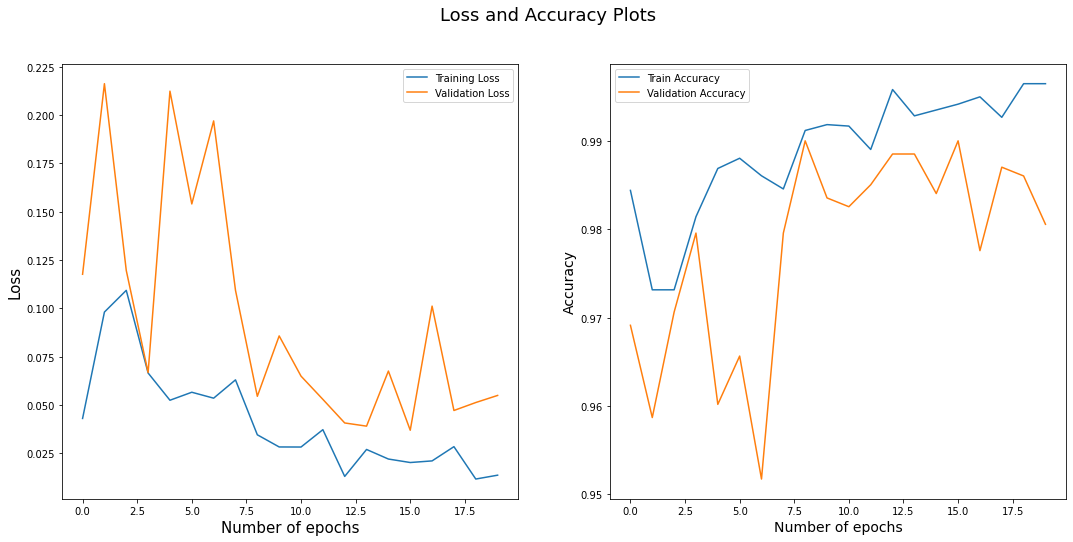

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))
plt.suptitle('Loss and Accuracy Plots', fontsize=18)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
model_mobile.save('/content/drive/MyDrive/Model/mobil_m5.h5')
np.save('/content/drive/MyDrive/Model/history_m5',history.history)
print('save')

save


In [ ]:
history=np.load('/content/drive/MyDrive/Model/history_m5.npy',allow_pickle=True).item()
model=load_model('/content/drive/MyDrive/Model/mobil_m5.h5')


In [ ]:
predictions = model_mobile.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
test_batches.class_indices

array([[3.3980905e-14, 2.2427742e-13, 9.7403882e-12, 1.3146408e-15,
        1.0000000e+00, 2.3603222e-13]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=predictions.argmax(axis=1))

In [ ]:
cm_plot_labels = ['100','1000','200','250','50','500']

Confusion matrix, without normalization
[[321   1   0   3   9   2]
 [  0 326   1   0   2   7]
 [  0   0 335   0   0   1]
 [  0   0   0 329   5   2]
 [  0   1   0   1 334   0]
 [  0   0   0   9   3 324]]


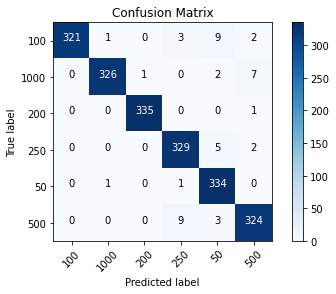

In [ ]:
cm_plot_labels = ['100','1000','200','250','50','500']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
os.chdir('/content/drive/MyDrive/Yemeni_coins2/newtest')
files=gb.glob('*')
len(files)

93

In [ ]:
in_data=[]
os.chdir('/content/drive/MyDrive/Yemeni_coins2/newtest')
files=gb.glob('*')
for c in files:
  pre_imge=prepare_image(c)
  in_data.append(pre_imge)
in_data=np.array(in_data)

pre_data=[]
for c in in_data:
  predictions =model.predict(c)
  pre_data.append(np.argmax(predictions))
pre_data=np.array(pre_data)

i=0
count=0
for c in files:
  if cm_plot_labels[pre_data[i]]!=c.split('_')[0]:
    print(f'{c}---{cm_plot_labels[pre_data[i]]}------- {i}')
    count+=1
  i+=1
print(f'the error is {count} from {len(files)} images')


50_55 (1).jpg---100------- 7
100_2.jpg---250------- 25
200_1 (1).jpg---500------- 26
200_1 (7).jpg---50------- 28
1000_5 ‫(227284727)‬ ‫‬.jpeg---50------- 87
the error is 5 from 93 images
